# Assignment 4
Carlos Guzman

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from IPython.display import Markdown as md

## Part 1: Naïve Bayes Classification for Text

My Naive Bayes Classifier class is what I call to instatiate a model. This class fits the training data and can be called to predict the class for a new sample. It is modeled after the Scikit Learn Models. You can also view the probabilies if you wish to and also contains Auxiliary Methods to help with the calculations for the training and testing steps.



In [ ]:
class Naive_Bayes_Classifier:
  def __init__(self, C, terms):
    """
    Constructor for Naive_Bayes_classifier.

    :param self:  Instance of clase
    :param C:     Number of classes.
    :param terms: The terms that are used in the dataset.
    """
    self.C = C
    self.terms = terms
  """ Train and Test Methods """
  def fit(self, X, y):
    """
    Training step for the model. Calculates the priors for the classes. 
    Then it calulates the likelihood the dataset.

    :param self:  Instance of class.
    :param X:     Data points
    :param y:     Ground truth class labels     
    """
    self.calculate_priors(y)
    self.calculate_likelihoods(X,y)
  def predict(self, X):
    """
    Predicting step for the model. Calculates the posteriors for the given 
    data points and returns predictions for each data point.

    :param self:  Instance of class.
    :param X:     Data points

    :return:      Calculated Predictions
    """
    self.calculate_posteriors(X)
    return np.argmax(self.posteriors, axis=1)

  """ Printing Methods """
  def view_priors(self):
    """
    This method allows the user to view the priors calculated for each class.

    :param self: Instance of class
    """
    for c in range(self.C):
      print(f'Class {c}: {self.priors[c]:.6f}')
  def view_likelihood(self, item):
    """
    This method allows the user to view the likelihood for an item(str or int).
    The user will either feed the index of the item (int) or the term (str).
    The will check the instance of item to see if it is an integer or string and
      return the corresponding likelihood for that item if it is in the dataset.
    
    :param self: Instance of class
    :param item: Item to look up. Can be an index(int) or the term(str).
    """
    if isinstance(item, int):
      if item < self.likelihoods.shape[0]:
        print(f'Probabilities for index {item}: {{{self.likelihoods[item,0]:.6f}, {self.likelihoods[item,1]:.6f}}}')
      else:
        print(f'Index {item} exceeds size of dataset.')
    elif isinstance(item, str):
      if (self.terms==item).sum():
        print(f'Probabilities for term \'{item}\': {{{self.likelihoods[self.terms==item,0][0]:.6f}, {self.likelihoods[self.terms==item,1][0]:.6f}}}')
      else:
        print(f'Term \'{item}\' not in dataset.')

  """ Auxiliary Methods """
  def calculate_priors(self, y):
    """
    Calculates the priors for each class and stores them in a 
      class variable.
    
    :param self:  Instance of class.
    :param y:     Class labels for each data point.
    """
    self.priors = np.zeros(shape=self.C, dtype=np.float64)
    for c in range(self.C):
      self.priors[c] = np.sum(y[y==c].shape) / y.shape[0]
  def calculate_likelihoods(self, X, y):
    """
    Calculates the likelihood for each term in the dataset and stores them in a
      class variable.
    
    :param self: Instance of class.
    :param X:     Data points
    :param y:     Ground truth class labels
    """
    self.likelihoods = np.zeros(shape=(X.shape[0], self.C), dtype=np.float64)
    for c in range(self.C):
      count_c = np.sum(X[:,y==c]) #Total number of elements in class c.
      for i in range(X_train.shape[0]):
        self.likelihoods[i,c] = (np.sum(X[i,y==c]) + 1) / (count_c + X.shape[0])
  def calculate_posteriors(self,X):
    """
    Calculates the posterior for each datapoint and stores them in a
      class variable.
    
    :param self:  Instance of class.
    :param X:     Data points
    """
    self.posteriors = np.zeros(shape=(X.shape[1], self.C), dtype=np.float32)
    for c in range(self.C):
      for j in range(X.shape[1]):
        self.posteriors[j,c] = np.sum(np.multiply(np.log10(self.likelihoods[:,c]), X[:,j])) + np.log10(self.priors[c])

In [ ]:
def evaluate_model(labels, predictions, verbose = False, i=0, j=-1):
  """
  This function takes in the predicted labels and truth labels and calculates 
    the accuracy of the model. If the verbose flag is on, then you can view the 
    truth label and predictions for a single term or a slice of the array.

  :param labels:      Truth labels.
  :param predicitons: Predictions generated by the model.
  :param verbose:     Flag to print the Labels and Predictions for a term or slice.
  :param i:           Used to slice the arrays. 
  :param j:           Used to slice the arrays. 

  :return:            Accuracy of the model.
  """
  labels = labels.astype(np.int32)
  if verbose:
    print(f'Labels: \t{labels[i:j]}')
    print(f'Predictions: \t{predictions[i:j]}')
  return (np.sum((predictions == y_test)) / y_test.shape)[0]

### Training The Model

Load the data from the files. Since they are text files we can just load using numpy.

In [ ]:
X_train, y_train = np.loadtxt('/content/drive/MyDrive/newsgroups/trainMatrix.txt', np.float64), np.loadtxt('/content/drive/MyDrive/newsgroups/trainClasses.txt', np.float64)[:,1]
X_test, y_test = np.loadtxt('/content/drive/MyDrive/newsgroups/testMatrix.txt', np.float32), np.loadtxt('/content/drive/MyDrive/newsgroups/testClasses.txt', np.float32)[:,1]
terms = np.loadtxt('/content/drive/MyDrive/newsgroups/terms.txt', object)

Instantiate the Naive_Bayes_Classifier and start training the model.

In [ ]:
model = Naive_Bayes_Classifier(len(np.unique(y_train)), terms)
model.fit(X_train, y_train)

### Testing The Model

Now that the model is trained. We can start evaluating the model with the test set. First we predict a class for the data points in the test set.

In [ ]:
y_pred = model.predict(X_test)

Next, we evaluate the model by calculating and printing the accuracy.

In [ ]:
accuracy = evaluate_model(y_test, y_pred)
md(f'$Test Results:$\n\n\t\t$Accuracy={accuracy*100:.2f}\%$')

$Test Results:$

		$Accuracy=99.50\%$

We can also view the truth labels and predictions for eith a slice of the test set or a certain element. For instance, the following shows the true labels and predictions for the first 20 elemetns in the test set.

In [ ]:
accuracy = evaluate_model(y_test, y_pred, verbose=True, i=0, j=20)
md(f'$Test Results:$\n\n\t\t$Accuracy={accuracy*100:.2f}\%$')

Labels: 	[1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0]
Predictions: 	[1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0]


$Test Results:$

		$Accuracy=99.50\%$

We can view the likelihoods for eith and index of the term or the term as a string. The following two lines show an example of both for the term 'fit' which is index 5271 in the training set array.

In [ ]:
# Has to be python int
idx = int(np.where(terms == 'fit')[0][0])
model.view_likelihood(idx)
model.view_likelihood('fit')

Probabilities for index 5271: {0.000109, 0.000018}
Probabilities for term 'fit': {0.000109, 0.000018}


Next we show the likelihoods for each of the following terms:

*   program
*   includ
*   match
*   game
*   plai
*   window
*   file
*   subject
*   write



In [ ]:
for s in ["program", "includ", "match", "game", "plai", "window", "file", "subject", "write"]:
  model.view_likelihood(s)

Probabilities for term 'program': {0.005902, 0.000110}
Probabilities for term 'includ': {0.005266, 0.000697}
Probabilities for term 'match': {0.000236, 0.000385}
Probabilities for term 'game': {0.000218, 0.012291}
Probabilities for term 'plai': {0.000127, 0.007265}
Probabilities for term 'window': {0.013057, 0.000055}
Probabilities for term 'file': {0.006701, 0.000055}
Probabilities for term 'subject': {0.009843, 0.007687}
Probabilities for term 'write': {0.003777, 0.005082}


Lastly we can view the values for the piors as well.

In [ ]:
model.view_priors()

Class 0: 0.501250
Class 1: 0.498750


## Part 2: Simple Recommender System using K-Nearest-Neighbor 

My Recommender Model is in the KNN class I created. You can give it a value for K which can be changed later and start predicting a rating for each data point that you wish to predict. It also generates a recommendation list for a user based on the rating they previous have. There are also auxilary methods to help with predictions and recommendations.

In [ ]:
class KNN:
  def __init__(self, K=1):
    """
    Constructor fo the class

    :param self:  Instance of class.
    :param K:     (Default 1) The number of neighbors to consider.
    """
    self.K = K
  def set_K(self, K):
    """
    Called to change the value of K.

    :param self:  Instance of class.
    :param K:     The number of neighbors to consider.
    """
    self.K = K
  def predict(self, train, user, item):
    """
    This method predicts a rating for a user. First it calculates a pearson
      correlation coefficient for the relations of a user's existing ratings with
      those of other users in the train set. Then it uses those coeffecients to 
      generate a prediction of the item's rating for the user.
    
    :param self:    Instance of class.
    :param train:   The train set.
    :param user:    The user to consider (predicit a value).
    :param item:     The item to predict a rating for the user.

    :return:       A prediction for the rating. 
    """
    pearsons = self.calculate_pearsons(train, user, item)
    prediction = self.generate_prediction(pearsons, item)
    return prediction

  def recommend(self, id, train, attrb_names, N):
    """
    This method provides a list of recommendations for a user. It first predicts 
      the values for a item that the user has not rated yet, then it uses those
      predicted ratings to generate a list of N recommendations.

    :param self:        Instance of class.
    :param id:          Id of user to generate a list of recommendations.
    :param train:       Training set used to generate predictions.
    :param attrb_names: Names of the attributes (i.e. movie names, jokes, etc.)
    :param N:           Max number of items to recommend.
    """
    preds = np.zeros(train[id].shape)
    for idx in np.where(train[id] == 0)[0]:
      preds[idx] = self.predict(train, train[id], idx)
    
    self.generate_recommendation(preds, N, attrb_names)

  """ Auxilary Methods """
  def calculate_pearsons(self, train, user, idx):
    """
    Calculates a perason correlation coefficient between the user and each sample
      from the training set.
    
    :param self: Instance of class.
    :param train: Training set.
    :param user:  User to consider.
    :param idx:   Index of the item we are predicting a rating.
    
    :return:      Array of pearson correlation coefficients.
    """
    pearsons = []
    # Iterate through each sample in the training set.
    for x in train:
      # Find the overlapping items rated that the sample and user have in common.
      intersect = np.intersect1d(np.where(x>0)[0], np.where(user>0)[0])
      if idx in intersect:
        # Can't use the rating for the item we are trying to predict.
        intersect = intersect[intersect != idx]
      if len(intersect) < 2 or not np.std(x[intersect]) or not np.std(user[intersect]):
        # Don't consider relations that will give us an undifined 
        #  correlation value. (i.e. standard deviation = 0)
        pearsons.append(-2)
      else:
        # Add pearson coefficient to the list, only consider those that are not 
        # undefined.
        r = pearsonr(x[intersect], user[intersect])[0]
        if np.isnan(r):
          pearsons.append(-2)
        else:
          pearsons.append(r)
    return np.array(pearsons)

  def generate_prediction(self, pearsons, item):
    """
    Uses the pearson coefficients calculated and generates a predition for the 
    rating of an item for the user using the K nearest neighbors. Calculates the
      weighted average of the K nearest neighbors' rating.

    :param self:      Instance of class.
    :param pearsons:  Pearson correlation coefficients.
    :param item:      The item to consider.

    :return:          The predicted rating.
    """
    # Used to calculated the weighted average. 
    # (sum_top is the numerator and sum_bottom is the denominator in the formula.
    sum_top, sum_bottom = 0,0
    # Iterate through the K nearest neighbors
    for _ in range(self.K):
      i = np.argmax(pearsons)
      # If there are no more neighbors to consider then stop searching 
      # i.e. K > number of neighbors 
      if pearsons[i] == -2:
        break
      sum_top += train[i,item] * pearsons[i]
      sum_bottom += pearsons[i]
      # Don't consider the neighbor we just used.
      pearsons[i] = -2
    return int(np.ceil((sum_top/sum_bottom)))
  def generate_recommendation(self, preds, N, attb_names):
    """
    Generates a list of recommendations based on the predictions for the items 
      not rated by the user.

    :param self:        Instance of class.
    :param preds:       The predictions calculated by the KNN model
    :param N:           Max number of items to recommend.
    :param attrb_names: Names of the attributes (i.e. movie names, jokes, etc.)
    """
    recommendations = dict()
    # Find the string value of the items we are trying to predict and create a 
    # dictionary that holds the corresponding rating.
    for n in range(N):
      if preds.sum():
        i = np.argmax(preds)
        recommendations[attb_names[i]] = preds[i]
        preds[i] = 0
        
    #Print the list.
    print(f'Your top {len(recommendations)} recommended movies are:')
    for i, (k,v) in enumerate(recommendations.items()):
      print(f'\t{i+1}) {k}, {v}')
    print('-'*100)

In [ ]:
def MAE(preds, labels):
  """
  Calculates the Mean Absolute Error between the predicted rating the the true rating.
  """
  N = preds.shape[0]
  return np.sum(np.abs(preds-labels))/N

### Training: Finding the optimal K

First we load the dataset using pandas and extract only the meaningful data for our model.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/recommonder/knn-csc480-a4.xls')
df = df.replace(r'\s+', np.nan, regex=True)
df.fillna(0, inplace=True, downcast='infer')
df.head()

,Unnamed: 0,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
0,U1,2,4,0,3,0,0,1,1
1,U2,0,5,0,0,3,2,1,0
2,U3,3,0,1,2,2,0,0,5
3,U4,0,3,0,0,4,1,0,3
4,U5,2,4,3,0,0,2,1,0


In [ ]:
movie_names = df.columns[1:].to_numpy()
movie_names

array(['TRUE BELIEVER', 'THE DA VINCI CODE', 'THE WORLD IS FLAT',
       'MY LIFE SO FAR', 'THE TAKING', 'THE KITE RUNNER', 'RUNNY BABBIT',
       'HARRY POTTER'], dtype=object)

Split into training set and testing set.

In [ ]:
df_train = df.iloc[:20, 1:]
df_train.head()

,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
0,2,4,0,3,0,0,1,1
1,0,5,0,0,3,2,1,0
2,3,0,1,2,2,0,0,5
3,0,3,0,0,4,1,0,3
4,2,4,3,0,0,2,1,0


In [ ]:
df_test = df.iloc[21:, 1:]
df_test.head()

,TRUE BELIEVER,THE DA VINCI CODE,THE WORLD IS FLAT,MY LIFE SO FAR,THE TAKING,THE KITE RUNNER,RUNNY BABBIT,HARRY POTTER
21,4,0,5,3,2,3,0,4
22,0,5,2,5,3,0,2,0
23,2,1,0,0,2,3,4,1
24,3,5,1,1,0,1,0,3
25,0,2,3,2,1,0,3,0


In [ ]:
train = df_train.to_numpy()
test = df_test.to_numpy()

Here we begin finding the optimal K for our KNN model by iterating through our testing set and predicting a value for each rating that is known using our training set. The change the value of K from K=1 to K=20 incrementing by one each time. We are using the MAE to evaulate the model.

In [ ]:
history = []
recommender = KNN()
for k in range(1,21):
  recommender.set_K(k)
  y_pred, y_true = [], []
  for y in test:
    for idx in np.where(y>0)[0]:
      pred = recommender.predict(train, y, idx)
      y_pred.append(pred)
      y_true.append(y[idx])
  history.append(MAE(np.array(y_pred), np.array(y_true)))

This graph shows the value of the calculated MAE against the value of K. We are trying to find the optimal K for our dataset, so we are trying to minimize the MAE.

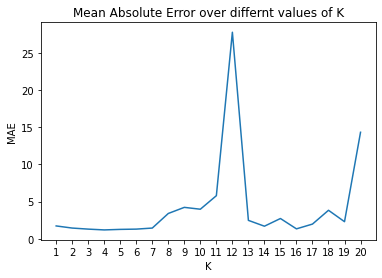

As we can see the optimal value we have is $K=4$ with an MAE value of 1.1786. Thus we test using this optimal $K$

In [ ]:
import matplotlib.pyplot as plt

plt.title('Mean Absolute Error over differnt values of K')
plt.plot(np.arange(1,21,1, dtype=np.int32), history)
plt.xticks(np.arange(1,21,1))
# plt.yticks(np.arange(0, max(history)+2, 2))
plt.xlabel('K')
plt.ylabel('MAE')
plt.show()

md(f'As we can see the optimal value we have is $K={np.argmin(history)+1}$ with an MAE value of {np.min(history):.4f}. Thus we test using this optimal $K$')

### Testing with the optimal K

Next we use the optimal K to predict the missing ratings for users NU1 and NU2

In [ ]:
recommender.set_K(4)
for i,y in enumerate(test[:2,:]):
  print(f'Predicting Missing Values for NU{i+1}: \n\t{y}')
  for idx in np.where(y==0)[0]:
    print(f'Prediction for NU{i+1} for {movie_names[idx]} is {recommender.predict(train,y,idx)}')
  print('-'*100)

Predicting Missing Values for NU1: 
	[4 0 5 3 2 3 0 4]
Prediction for NU1 for THE DA VINCI CODE is 3
Prediction for NU1 for RUNNY BABBIT is 2
----------------------------------------------------------------------------------------------------
Predicting Missing Values for NU2: 
	[0 5 2 5 3 0 2 0]
Prediction for NU2 for TRUE BELIEVER is 2
Prediction for NU2 for THE KITE RUNNER is 2
Prediction for NU2 for HARRY POTTER is 2
----------------------------------------------------------------------------------------------------


### Generating a list of Recommendations

Here we use a value of K=4 to generate a list of recommendations for users 2,5,13, and 20

In [ ]:
recommender.set_K(4)
for id in [1,4,12,19]:
  recommender.recommend(id, train, movie_names, 3)

Your top 3 recommended movies are:
	1) HARRY POTTER, 3.0
	2) TRUE BELIEVER, 2.0
	3) THE WORLD IS FLAT, 2.0
----------------------------------------------------------------------------------------------------
Your top 3 recommended movies are:
	1) THE TAKING, 2.0
	2) HARRY POTTER, 2.0
	3) MY LIFE SO FAR, 1.0
----------------------------------------------------------------------------------------------------
Your top 3 recommended movies are:
	1) THE DA VINCI CODE, 3.0
	2) THE KITE RUNNER, 3.0
	3) TRUE BELIEVER, 2.0
----------------------------------------------------------------------------------------------------
Your top 1 recommended movies are:
	1) RUNNY BABBIT, 2.0
----------------------------------------------------------------------------------------------------


## Extra Credit: Joke Recommender System using K-Nearest-Neighbor 

For this part we run the same experiment as above to find the optimal K for the new joke rating dataset. We are simply just importing the data and spliting it into a training and test set. Then we find the optimal K and generate a list of recommendations for a user using the optimal K

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/recommonder/jokes/modified_jester_data.csv', header=None).iloc[900:, :].to_numpy()

In [ ]:
movie_names = pd.read_csv('/content/drive/MyDrive/recommonder/jokes/jokes.csv', header=None).iloc[:, 1].to_numpy()

In [ ]:
np.random.shuffle(df)
train, test = df[:80,:], df[80:, :]

In [ ]:
history = []
recommender = KNN()
for k in range(1,51):
  print(f'\rK: {k}', end='')
  recommender.set_K(k)
  y_pred, y_true = [], []
  for y in test:
    for idx in np.where(y>0)[0]:
      pred = recommender.predict(train, y, idx)
      y_pred.append(pred)
      y_true.append(y[idx])
  history.append(MAE(np.array(y_pred), np.array(y_true)))

K: 50

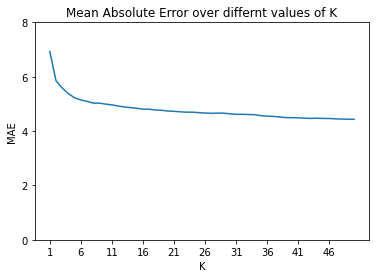

As we can see the optimal value we have is $K=50$ with an MAE value of 4.4323.

In [ ]:
import matplotlib.pyplot as plt

plt.title('Mean Absolute Error over differnt values of K')
plt.plot(np.arange(1,51,1, dtype=np.int32), history)
plt.xticks(np.arange(1,51,5))
plt.yticks(np.arange(0, max(history)+2, 2))
plt.xlabel('K')
plt.ylabel('MAE')
plt.show()
md(f'As we can see the optimal value we have is $K={np.argmin(history)+1}$ with an MAE value of {np.min(history):.4f}.')

In [ ]:
history = np.array(history)
history[:11].flatten(), history[11:22].flatten(), history[30:].flatten()

(array([6.92753358, 5.85250305, 5.58299145, 5.37643468, 5.22371184,
        5.14410256, 5.09221001, 5.028779  , 5.02749695, 4.99163614,
        4.96478632]),
 array([4.92462759, 4.88714286, 4.86382173, 4.83842491, 4.8060928 ,
        4.80482295, 4.77485958, 4.76411477, 4.73864469, 4.72797314,
        4.70940171]),
 array([4.61505495, 4.6174359 , 4.61009768, 4.60283272, 4.56791209,
        4.54777778, 4.53980464, 4.5201221 , 4.49542125, 4.49393162,
        4.48799756, 4.47525031, 4.46614164, 4.4729304 , 4.46460317,
        4.46350427, 4.45034188, 4.44155067, 4.43774115, 4.43229548]))

Now that we have found the optimal $K$ we begin to use it to generate a list of recommendaitons for a user.

In [ ]:
recommender.set_K(15)
for i,y in enumerate(test[:2,:]):
  print(f'Predicting Missing Values for NU{i+1}: \n\t{y}')
  for idx in np.where(y==0)[0]:
    print(f'Prediction for NU{i+1} for {movie_names[idx]} is {recommender.predict(train,y,idx)}')
  print('-'*100)

Predicting Missing Values for NU1: 
	[ 3.67  4.45  3.67  3.67  9.4   7.65  3.86  4.4   3.67  4.93  4.45  3.38
  4.4   3.38  9.93  3.48  4.4   4.4   9.98  3.86  9.79  3.38  3.38  3.67
  3.38  6.78 11.49  3.33  3.62  3.62  7.36  7.84  3.67  7.65  8.43  8.52
  3.62  3.38  3.38  3.38  7.12 10.17 10.03  3.86  3.38  7.02  3.62  3.38
  3.33  7.7   6.63  4.45  3.77  6.83  3.86  3.86  3.67  3.67  3.67  3.67
  7.21  8.33  3.38  3.67  7.17  6.83  3.67  3.77  3.86  3.38  4.3   4.3
  4.3   4.3   3.86  6.63  4.11  4.11  7.21  3.82  3.82  3.82  3.82  3.33
  4.16  9.2   4.16  4.16  3.82  3.82  3.82  6.87  6.87  3.77  3.77  3.77
  3.77  3.77  3.77  3.28]
----------------------------------------------------------------------------------------------------
Predicting Missing Values for NU2: 
	[10.47 14.11 12.41 12.84 11.34 12.36 11.19 12.99  5.71 12.6  12.84 13.72
 11.1  13.48 10.37  5.85  3.43 12.02 12.02  7.8  14.79 12.26 13.72  9.83
 11.19 12.84 13.67 13.23 12.84 12.02 13.62 13.82  4.59 11.53 13.82 14.

Finally we list the recommendtions for three users

In [ ]:
recommender.set_K(15)
np.random.shuffle(test)
for id in range(len(test)):
  recommender.recommend(id, train, movie_names, 3)
  if id == 3:
    break

Your top 3 recommended movies are:
	1) A bus station is where a bus stops.A train station is where a train stops.On my desk I have a work station..., 5.0
	2) A Panda bear walks into a bar.  Sits down at a table and orders a beer and a double cheeseburger.  After he is finished eating he pulls out a gun and rips the place with gunfire.  Patrons scatter and dive under chairs and tables as the bear runs out the door.  After ensuring that no one is hurt the bartender races out the door and calls after the bear "What the hell did you do that for?"  The bear calls back "I'm a Panda bear.  Look it up in the dictionary."  The bartender returns pulls out his dictionary.panda : \Pan"da\ n. (Zo["o]l.)A small Asiatic mammal (Ailurus fulgens) having fine soft fur.It is related to the bears and inhabits the mountains of Northern India.Eats shoots and leaves., 4.0
	3) Two atoms are walking down the street when one atom says to the other "Oh my! I've lost an electron!"The second atom says"Are you sure

In [ ]:
import numpy as np

m = [1,1,2,3,4,4]
l=[4,5,3,3,2,1]
e = [5,4,4,4,1,2]

c1 = [1.67, 1, 2.3, 2.67, 4.33, 4,33]
c2 = [4.5, 5, 3, 3, 1.5, 1]



In [ ]:
sum([m[i] * c1[i] for i in range(len(m))]), sum([m[i] * c2[i] for i in range(len(m))])

(48.6, 34.5)

In [ ]:
sum([l[i] * c1[i] for i in range(len(m))]), sum([l[i] * c2[i] for i in range(len(m))])

(39.25, 65.0)

In [ ]:
sum([e[i] * c1[i] for i in range(len(m))]), sum([e[i] * c2[i] for i in range(len(m))])

(44.559999999999995, 70.0)